In [2]:
# Multilayer Perceptron (MLP)
# # Based on approach (Bengio et al. 2003): https://www.jmlr.org/papers/volume3/bengio03a/bengio03a.pdf
# https://www.youtube.com/watch?v=TCH_1BHY58I&list=PLAqhIrjkxbuWI23v9cThsA9GvCAUhRvKZ&index=3
# https://github.com/karpathy/nn-zero-to-hero/blob/master/lectures/makemore/makemore_part2_mlp.ipynb



In [3]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt 
%matplotlib inline

In [4]:
words = open('names.txt', 'r').read().splitlines()

In [5]:
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [6]:
len(words)

32033

In [7]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [ ]:
block_size = 3

X, Y = [], []

for w in words[:5]:
    print(w)
    context = [0] * block_size
    #print(context)
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        print(f'{context} -> {ix}')
        print(''.join(itos[i] for i in context), '--->', itos[ix])
        #print(context[1:])
        #print(''.join(itos[i] for i in context), '--->', itos[ix])
        context = context[1:] + [ix]
        #print(context[1:] +[ix])
        
X = torch.tensor(X)
Y = torch.tensor(Y)

In [ ]:
X.shape

#### Embedding Layer

 this layer maps input information from a high-dimensional to a lower-dimensional space, allowing the network to learn more about the relationship between inputs and to process the data more efficiently. 

In [ ]:
C = torch.randn((27, 2))
print(C[20:27])
print(C[0])
print(X[27,2])
print(C[X][15])

print(C.shape)
print(X.shape)
print((C[X].shape))

In [ ]:
C[5]

In [ ]:
# is equivalent to the the weight matrix: so this the first layer of this neural network is just coming from the weight matrix
F.one_hot(torch.tensor(5), num_classes=27).float() @ C 

In [ ]:
C[[5,6,7]]

In [ ]:
# Relationship
print(X[14,2])
print(C[X][14,2])
print(C[22])
#print(C[X].shape)
print(C[X])

In [ ]:
X.shape
X

In [ ]:
emb = C[X]
emb.shape

#### Hidden Layer

In [ ]:
W1 = torch.randn(6, 100) 
b1 = torch.randn(100) 

In [ ]:
print(torch.cat([emb[: , 0, :], emb[: , 1, :], emb[: , 2, :]], dim=1).shape)
torch.cat([emb[: , 0, :], emb[: , 1, :], emb[: , 2, :]], dim=1)

In [ ]:
# more efficent: idependent of number of emb
torch.cat(torch.unbind(emb, 1),1).shape 

In [ ]:
# even more efficient
a = torch.arange(18)
a

print(a.view(9,2))
print(a.view(9,2))
print(a.view(3,3,2))

In [ ]:
emb.view(32,6) == torch.cat(torch.unbind(emb, 1),1)

In [ ]:
print((emb.view(emb.shape[0],6) @ W1 + b1).shape)
print(emb.view(emb.shape[0],6) @ W1 + b1)


In [ ]:
h = torch.tanh(emb.view(emb.shape[0],6) @ W1 + b1)  # tanh: -1 until +1

In [ ]:
W2 = torch.randn(100, 27)
b2 = torch.randn(27)


In [ ]:
logits = h @ W2 + b2
logits.shape

# Softmax
counts = logits.exp()  # equivalent to N matrix from above
prob = counts / counts.sum(1, keepdims=True)  #normalized counts to probabilities
print(prob.shape)
print(prob[0].sum())

In [ ]:
prob[torch.arange(32), Y]

In [ ]:
-prob[torch.arange(32), Y].log().mean()

#### More Comprehensive 

In [ ]:
block_size = 3

X, Y = [], []

for w in words[:5]:
    print(w)
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        context = context[1:] + [ix]
        
X = torch.tensor(X)
Y = torch.tensor(Y)

In [ ]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator=g)
W1 = torch.randn(6, 100, generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)

parameters = [C, W1, b1, W2, b2]

In [ ]:
#emb = C[X]
#h = torch.tanh(emb.view(emb.shape[0],6) @ W1 + b1)  # tanh: -1 until +1
#logits = h @ W2 + b2
#counts = logits.exp()  # equivalent to N matrix from above
#prob = counts / counts.sum(1, keepdims=True)  #normalized counts to probabilities

#loss1 = -prob[torch.arange(32), Y].log().mean()
#print(loss1)

In [ ]:
emb = C[X]
h = torch.tanh(emb.view(emb.shape[0],6) @ W1 + b1)  # tanh: -1 until +1
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y)  # equivalent, but much more efficient. + logits.exp() can produce values up to infinity; F.cross_entropy substracts the maximum value internally and solves this problem
print(loss)

In [ ]:
for p in parameters:
    p.requires_grad = True
    
for _ in range(1000):

    # Forward Pass
    emb = C[X]
    h = torch.tanh(emb.view(emb.shape[0],6) @ W1 + b1) 
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y)  
    print(loss.item())
    
    # Backward Pass
    for p in parameters:
        p.grad = None
    loss.backward()
    
    # Update
    for p in parameters:
        p.data += -0.1 * p.grad

#### Full Model

In [ ]:
block_size = 3

X, Y = [], []

for w in words:
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        context = context[1:] + [ix]
        
X = torch.tensor(X)
Y = torch.tensor(Y)

In [ ]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator=g)
W1 = torch.randn(6, 100, generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)

parameters = [C, W1, b1, W2, b2]

In [ ]:
for p in parameters:
    p.requires_grad = True
    
for _ in range(100):

    # Forward Pass
    emb = C[X]
    h = torch.tanh(emb.view(emb.shape[0],6) @ W1 + b1) 
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y)  
    print(loss.item())
    
    # Backward Pass
    for p in parameters:
        p.grad = None
    loss.backward()
    
    # Update
    for p in parameters:
        p.data += -0.1 * p.grad

#### How to determine Learning Rate parameter?

In [ ]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator=g)
W1 = torch.randn(6, 100, generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)

parameters = [C, W1, b1, W2, b2]

In [ ]:
block_size = 3

X, Y = [], []

for w in words:
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        context = context[1:] + [ix]
        
X = torch.tensor(X)
Y = torch.tensor(Y)

In [ ]:
# 
lre = torch.linspace(-3,0, 1000)
lrs = 10**lre
print(lrs)

In [ ]:
# Add multiple minibatches
gix = torch.Generator().manual_seed(2147483647)
lri = []
losses = []

for p in parameters:
    p.requires_grad = True
    
for i in range(1000):
    
    # Construct Minibatch of 128 Names
    ix = torch.randint(0, X.shape[0], (128,), generator=gix)  # here also a seed should be set

    # Forward Pass
    emb = C[X[ix]]
    h = torch.tanh(emb.view(emb.shape[0],6) @ W1 + b1) 
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y[ix])  
    print(loss.item())
    
    # Backward Pass
    for p in parameters:
        p.grad = None
    loss.backward()
    
    # Update
    lr = lrs[i]
    for p in parameters:
        p.data += -lr * p.grad
    
    # Track Learning Rate and Loss
    lri.append(lre[i])
    losses.append(loss.item())


In [ ]:
plt.plot(lri, losses) # Learning Rate around 10**-1 = 0.1

#### Use Train, Def/Validation, and Test Splits

In [ ]:
def build_dataset(words):
    block_size = 3

    X, Y = [], []

    for w in words:
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix]
            
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    return X, Y

import random
random.seed(42)

random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

X_train , Y_train = build_dataset(words[:n1])
X_val, Y_val = build_dataset(words[n1:n2])
X_test, Y_test = build_dataset(words[n2:])


In [ ]:
seed = 2147483647

g = torch.Generator().manual_seed(seed)
C = torch.randn((27, 2), generator=g)
W1 = torch.randn(6, 300, generator=g)
b1 = torch.randn(300, generator=g)
W2 = torch.randn((300, 27), generator=g)
b2 = torch.randn(27, generator=g)

 
parameters = [C, W1, b1, W2, b2]

In [ ]:
# Add multiple minibatches
steps=[]
losses=[]
for p in parameters:
    p.requires_grad = True
    
for i in range(1000):
    
    gix = torch.Generator().manual_seed(seed)
    # Construct Minibatch of 128 Names
    ix = torch.randint(0, X_train.shape[0], (128,), generator = gix)
    seed += 1
    
    # Forward Pass
    emb = C[X_train[ix]]
    h = torch.tanh(emb.view(emb.shape[0],6) @ W1 + b1) 
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y_train[ix])  
    
    # Backward Pass
    for p in parameters:
        p.grad = None
    loss.backward()
    
    # Update
    lr = 0.1
    for p in parameters:
        p.data += -lr * p.grad
    # Stats
    steps.append(i)
    losses.append(loss.item())
#print(loss.item())


In [ ]:
plt.plot(steps, losses)

In [ ]:
emb = C[X_train]  
h = torch.tanh(emb.view(emb.shape[0],6) @ W1 + b1) 
logits = h @ W2 + b2
loss_dev = F.cross_entropy(logits, Y_train) 
loss_dev

In [ ]:
emb = C[X_val]  
h = torch.tanh(emb.view(emb.shape[0],6) @ W1 + b1) 
logits = h @ W2 + b2
loss_dev = F.cross_entropy(logits, Y_val) 
loss_dev

In [ ]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

#### Increase Imeddings

In [8]:
def build_dataset(words):
    block_size = 3

    X, Y = [], []

    for w in words:
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix]
            
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    return X, Y

import random
random.seed(42)

random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

X_train , Y_train = build_dataset(words[:n1])
X_val, Y_val = build_dataset(words[n1:n2])
X_test, Y_test = build_dataset(words[n2:])



seed = 2147483647

g = torch.Generator().manual_seed(seed)
C = torch.randn((27, 20), generator=g)
W1 = torch.randn(60, 500, generator=g)
b1 = torch.randn(500, generator=g)
W2 = torch.randn((500, 27), generator=g)
b2 = torch.randn(27, generator=g)

 
parameters = [C, W1, b1, W2, b2]

# Add multiple minibatches
steps=[]
losses=[]



In [9]:
for p in parameters:
    p.requires_grad = True
    
for i in range(100000):
    
    gix = torch.Generator().manual_seed(seed)
    # Construct Minibatch of 128 Names
    ix = torch.randint(0, X_train.shape[0], (512,), generator = gix)
    seed += 1
    
    # Forward Pass
    emb = C[X_train[ix]]
    h = torch.tanh(emb.view(emb.shape[0],60) @ W1 + b1) 
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y_train[ix])  
    
    # Backward Pass
    for p in parameters:
        p.grad = None
    loss.backward()
    
    # Update
    lr = 0.1
    for p in parameters:
        p.data += -lr * p.grad
    # Stats

    steps.append(i)
    losses.append(loss.log10().item())
    #print(len(steps),len(losses))
#print(loss.item())

In [10]:
len(steps), len(losses)

(100000, 100000)

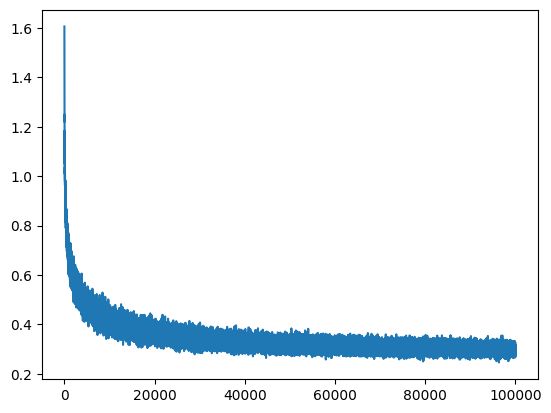

In [11]:
plt.plot(steps, losses)

In [12]:
emb = C[X_train]  
h = torch.tanh(emb.view(emb.shape[0],60) @ W1 + b1) 
logits = h @ W2 + b2
loss_dev = F.cross_entropy(logits, Y_train) 
loss_dev

tensor(1.9943, grad_fn=<NllLossBackward0>)

In [13]:
emb = C[X_test]  
h = torch.tanh(emb.view(emb.shape[0],60) @ W1 + b1) 
logits = h @ W2 + b2
loss_dev = F.cross_entropy(logits, Y_test) 
loss_dev

tensor(2.3039, grad_fn=<NllLossBackward0>)

In [15]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 1000)
block_size = 3

for _ in range(20):
    
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

naitana.
emma.
ziya.
bron.
kalen.
lei.
jamarah.
lyler.
mar.
embere.
rayden.
marion.
wiselistie.
meraj.
killa.
shine.
zaryan.
masey.
cyn.
nen.


#### Add another layer